<a href="https://colab.research.google.com/github/S498/CMPE297Section1FinalProject/blob/main/craigslistads4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculated and updated the Rouge scores in df1

6
https://raleigh.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
5
https://raleigh.craigslist.org/search/cta?s=120&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
4
https://raleigh.craigslist.org/search/cta?s=240&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
3
https://raleigh.craigslist.org/search/cta?s=360&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
2
https://raleigh.craigslist.org/search/cta?s=480&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
1
https://raleigh.craigslist.org/search/cta?s=600&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
6
https://boone.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
5
https://boone.craigslist.org/search/cta?s=120&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
4
https://boone.craigslist.org/search/cta?s=240&min_price=500&ma

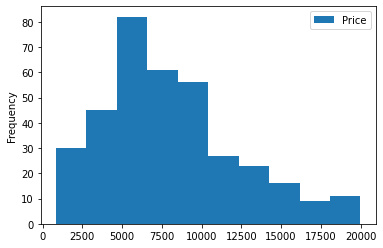

Boone


AttributeError: ignored

In [ ]:
from bs4 import BeautifulSoup #web scraping

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import re
import requests #http requests
from requests import get
from urllib.request import urlopen
def craigs_list(locations, min_price, max_price, min_year, max_year):
    
    dfs = []
    master = []

    for location in locations:
        
        s = 0
        ##https://raleigh.craigslist.org/search/cta?s=0&min_price=500&max_price=20000&min_auto_year=2000&max_auto_year=2010
        ##https://sfbay.craigslist.org/search/cta?hasPic=1#search=1~gallery~0~0
        url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + "&min_price=" + str(min_price) + "&max_price=" + str(max_price) + "&min_auto_year=" + str(min_year) +"&max_auto_year=" + str(max_year)
        r  = requests.get(url)
        html_page = r.text
        soup = BeautifulSoup(html_page, "lxml")
        #total = str(soup.findAll("span", {"class": "totalcount"})[0].contents)[2:-2]
        count = 6
        
        while(count > 0):
            print(count)
            url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + "&min_price=" + str(min_price) + "&max_price=" + str(max_price) + "&min_auto_year=" + str(min_year) +"&max_auto_year=" + str(max_year)
            print(url)
            r  = requests.get(url)
            html_page = r.text
            soup = BeautifulSoup(html_page, "lxml")
            
            values = add_to_df(soup)
            s = s + 120
            count = count - 1


            craig_df = pd.DataFrame(np.column_stack([values[0], values[1], values[2],values[3], values[4], values[5]]),
                columns = ["Price", "Location","Title","Link", "Date", "Description"])
            craig_df = craig_df.dropna()
           
            dfs.append(craig_df)
        
            craig_df = 0
            
        #concat all dfs here
        d = pd.concat(dfs)
        master.append(d)
        d=[]
        dfs = []
        
    
    return master
    
	
	
def graph_cars(df):
    df2 = df.iloc[:, :2].copy()
    df2['Price'] = df2['Price'].str[1:]
    df2['Price'] = df2['Price'].str.replace(',', '').astype(int)
    df2.plot(kind='hist', y = "Price")
    plt.show()
	
def remove_html_tags(text):
    substring = "QR Code Link to This Post"
    text = text.split(substring)
    text = re.sub("{<p[^>]*</p>}", "", text[1])
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
def remove_empty_line(text):
    clean = re.compile('^(?:[\t ]*(?:\r?\n|\r))+')
    return re.sub(clean, '', text)

def add_to_df(soup):
    link_list = []
    listing_price = []
    prices = []
    hoods = []
    titles = []
    make_model = []
    year = []
    miles = []
    odometer = []
    date = []
    description = []
   
 
    for car in soup.find_all('li', class_= 'result-row'):
            
        try:
            location = str(car.find(class_ = "result-hood").contents)
            hoods.append(location[4:-3])
        except:
            hoods.append('N/A')
                
        try:
            prices.append(car.find(class_ = "result-price").contents)
        except:
            #not possible
            prices.append('N/A')
                
        try:
            titles.append(car.find(class_ = "result-title hdrlnk").contents)
        except:
            titles.append('N/A')
                
        try:
            date.append(car.find(class_ = "result-date").contents)
        except:
            date.append('N/A')
        
        
        try:
            requests = get(car.find('a')['href'])
            html_soup = BeautifulSoup(requests.text, "lxml")
            posting_body=html_soup.find('section',{'id':'postingbody'})
            posting_body= remove_html_tags(str(posting_body.text))
            text = remove_empty_line(posting_body)
            description.append(text)
        except:
            description.append('N/A')
                   
        
    for car in soup.findAll("a", {"class": "result-title hdrlnk"}):
        link_list.append(car['href'])
        
        

    return [prices, hoods, titles, link_list, date, description]
	
	
	
locations = ["raleigh", "boone"]
min_price = 500
max_price= 20000
min_year = 2000
max_year = 2010
df = craigs_list(locations, min_price, max_price, min_year, max_year)
	
	
print("Raleigh")
graph_cars(df[0])
print("Boone")
graph_cars(df[1])


# Description Data Frame
# Addition: Car model, Vin, Condition, drive, fuel, odometer, title status, transmission, type

In [ ]:
from bs4 import BeautifulSoup #web scraping

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import re
import requests #http requests
from requests import get
from urllib.request import urlopen

In [ ]:
pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge
ROUGE = Rouge()

In [ ]:
# df1 = pd.DataFrame(df[0]) 
# df2 = pd.DataFrame(df[1]) 

df1 = pd.read_csv('df1.csv') 
df2 = pd.read_csv('df2.csv') 

In [ ]:
display(df1)

,Unnamed: 0,Price,Location,Title,Link,Date,Description
0,0,"$3,000",Cary,2008 Honda Civic,https://raleigh.craigslist.org/cto/d/cary-2008...,Nov 24,This is Amy (my daughter names all of our cars...
1,1,"$5,900","Kenly NC,",NC 2005 Buick (low miles),https://raleigh.craigslist.org/ctd/d/kenly-nc-...,Nov 24,"Nice NC clean title 2005 Buick Lacrosse CXL, j..."
2,2,"$5,300",Durham,Toyota Avalon Limited 2007,https://raleigh.craigslist.org/cto/d/durham-to...,Nov 24,"I want to sell my car, Toyota Avalon 2007, it ..."
3,3,"$8,500","Smithfield, N.C.",2010 MAZDA CX-9 TOURING❤️~~ JZ CARS INC ~~⭐,https://raleigh.craigslist.org/ctd/d/pine-leve...,Nov 24,"DLR#:80341\n\nJZ CARS, INC.\n4187 US HWY 70 E...."
4,4,"$8,500","Smithfield, N.C.",2010 CHRYSLER SEBRING LIMITED CONVERTIBLE LOW ...,https://raleigh.craigslist.org/ctd/d/pine-leve...,Nov 24,"DLR#:80341\n\nJZ CARS, INC.\n4187 US HWY 70 E...."
...,...,...,...,...,...,...,...
715,115,"$5,500",Longs,2005 Chevrolet Tahoe,https://raleigh.craigslist.org/cto/d/longs-200...,Oct 28,2005 Chevrolet Tahoe\n4WD \n5.3 Liter V8\nNEW ...
716,116,"$4,500",NaN,F 150,https://raleigh.craigslist.org/ctd/d/raleigh-1...,Oct 28,2005 Ford F-150 2 WD / 4.6 engine/ automatic ...
717,117,$750,rAleigh north carolina,mechanics dresm,https://raleigh.craigslist.org/cto/d/raleigh-m...,Oct 28,Selling cheap because needs new motor and the ...
718,118,"$15,995",CORPORATE WHOLESALE,2010 CHEVY G3500 CUTAWAY 12' BOX TRUCK DUALLY ...,https://raleigh.craigslist.org/ctd/d/wilmingto...,Oct 28,SAVE THOUSANDS! WONT BE HERE LONG AT THIS PRIC...


In [ ]:
display(df2)

,Unnamed: 0,Price,Location,Title,Link,Date,Description
0,0,"$19,990",TOUCHLESS DELIVERY TO YOUR HOME,2010 Toyota RAV4 Limited Sport Utility 4D suv ...,https://boone.craigslist.org/ctd/d/boone-2010-...,Nov 23,"At Carvana, we go miles beyond the extra mile...."
1,1,"$1,500",Newland NC,2003 ford e150 work van,https://boone.craigslist.org/cto/d/montezuma-2...,Nov 22,Solid work van no rust. Built in shelves.Runs ...
2,2,"$3,000",Jefferson,2007 Jeep Patriot,https://boone.craigslist.org/cto/d/jefferson-2...,Nov 20,"I have a 2007 Jeep Patriot clean title, 4x4, 2..."
3,3,"$3,500",NaN,2004 Mitsubishi Lancer Sportback LS,https://boone.craigslist.org/cto/d/jefferson-2...,Nov 19,Rare 2004 Mitsubishi Lancer Sportback LS\n\nTh...
4,4,"$6,999",Gastonia,2003 Honda Element EX AWD,https://boone.craigslist.org/ctd/d/mc-adenvill...,Nov 18,**ONE OWNER VEHICLE**2003 Honda Element EX AWD...
5,5,"$6,000",Boone,2008 Subaru Outback GREAT SNOW CAR!,https://boone.craigslist.org/cto/d/boone-2008-...,Nov 16,Great snow car for sale. 2008 Subaru Outback 2...
6,6,"$3,500",NaN,2005 Toyota 4Runner,https://boone.craigslist.org/cto/d/lakeview-20...,Nov 15,2005 Toyota 4Runner Ltd. Sport Utility 4D\n\n*...
7,7,"$4,250",West Jefferson,2008 Cheverolet Colorado Work Truck,https://boone.craigslist.org/cto/d/boone-2008-...,Nov 15,Colorado work truck (5 speed) runs good. New t...
8,8,"$7,500",Boone,2006 Honda CRV,https://boone.craigslist.org/cto/d/boone-2006-...,Nov 15,2006 Honda CRV for sale.\n191k mikes. \nAll Wh...
9,9,"$5,900",Lexington,2005 Ford Escape XLT 4WD,https://boone.craigslist.org/ctd/d/lexington-2...,Nov 14,2005 Ford Escape XLT 4WD\nOne Owner - Only 124...


In [ ]:
df1.iloc[1]['Description']

'Nice NC clean title 2005 Buick Lacrosse CXL, just serviced and inspected, V-6 3800 engine, very good on gas, very clean inside and out, good tires, cold ac, miles only 94,000   call 252-289-3187\n'

In [ ]:
# from google.colab import files

# df1.to_csv('df1.csv', encoding = 'utf-8-sig') 
# files.download('df1.csv')
# df2.to_csv('df2.csv', encoding = 'utf-8-sig') 
# files.download('df2.csv')

In [ ]:
df1.size

5040

In [ ]:
text =str(df1.iloc[1]['Description'])

In [ ]:
print(text)

Nice NC clean title 2005 Buick Lacrosse CXL, just serviced and inspected, V-6 3800 engine, very good on gas, very clean inside and out, good tires, cold ac, miles only 94,000   call 252-289-3187



In [ ]:
pip install happytransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from happytransformer import  HappyTextToText

In [ ]:
happy_tt = HappyTextToText("DISTILBART", "sshleifer/distilbart-cnn-12-6")

In [ ]:
result = happy_tt.generate_text(text)

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
happy_tt.generate_text("sample").text

' Sample sample sample from sample . Sample of samples from the sample .'

In [ ]:
# df1['result'] = df1['Description'].apply(lambda row: happy_tt.generate_text(str(row.Description)).text, axis = 1)

temp_result = []
for _, item in df1.iterrows():
  temp_result.append(happy_tt.generate_text(str(item.Description[:1024])).text)
df1['result'] = temp_result

Unnamed: 0                                                     0
Price                                                     $3,000
Location                                                    Cary
Title                                           2008 Honda Civic
Link           https://raleigh.craigslist.org/cto/d/cary-2008...
Date                                                      Nov 24
Description    This is Amy (my daughter names all of our cars...
Name: 0, dtype: object
done
Unnamed: 0                                                     1
Price                                                     $5,900
Location                                               Kenly NC,
Title                                  NC 2005 Buick (low miles)
Link           https://raleigh.craigslist.org/ctd/d/kenly-nc-...
Date                                                      Nov 24
Description    Nice NC clean title 2005 Buick Lacrosse CXL, j...
Name: 1, dtype: object
done
Unnamed: 0                        

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1046: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


Streaming output truncated to the last 5000 lines.
Link           https://raleigh.craigslist.org/ctd/d/raleigh-2...
Date                                                      Nov 18
Description    2006 BMW 530i\nAutomatic - 5 Series  - 6 Cyl E...
Name: 164, dtype: object
done
Unnamed: 0                                                    45
Price                                                     $7,900
Location                                             Chapel Hill
Title                                         2008 Infinity EX35
Link           https://raleigh.craigslist.org/cto/d/chapel-hi...
Date                                                      Nov 18
Description    2008 Infinity EX35, 161K in great condition, n...
Name: 165, dtype: object
done
Unnamed: 0                                                    46
Price                                                     $6,800
Location                                                     NaN
Title                                    200

NameError: ignored

In [ ]:
df1.head()

,Unnamed: 0,Price,Location,Title,Link,Date,Description,result
0,0,"$3,000",Cary,2008 Honda Civic,https://raleigh.craigslist.org/cto/d/cary-2008...,Nov 24,This is Amy (my daughter names all of our cars...,Amy has 197K miles but runs like a top and st...
1,1,"$5,900","Kenly NC,",NC 2005 Buick (low miles),https://raleigh.craigslist.org/ctd/d/kenly-nc-...,Nov 24,"Nice NC clean title 2005 Buick Lacrosse CXL, j...",2005 Buick Lacrosse CXL has a V-6 3800 engine...
2,2,"$5,300",Durham,Toyota Avalon Limited 2007,https://raleigh.craigslist.org/cto/d/durham-to...,Nov 24,"I want to sell my car, Toyota Avalon 2007, it ...",The Toyota Avalon 2007 is a front-wheel drive...
3,3,"$8,500","Smithfield, N.C.",2010 MAZDA CX-9 TOURING❤️~~ JZ CARS INC ~~⭐,https://raleigh.craigslist.org/ctd/d/pine-leve...,Nov 24,"DLR#:80341\n\nJZ CARS, INC.\n4187 US HWY 70 E....",The 2010 MAZDA CX-9 is a 2010 model that has ...
4,4,"$8,500","Smithfield, N.C.",2010 CHRYSLER SEBRING LIMITED CONVERTIBLE LOW ...,https://raleigh.craigslist.org/ctd/d/pine-leve...,Nov 24,"DLR#:80341\n\nJZ CARS, INC.\n4187 US HWY 70 E....",The 2010 CHRYSLER SEBRING has a 2010 model wi...


In [ ]:
from happytransformer.happy_text_to_text import TTSettings
top_k_sampling_settings = TTSettings(do_sample=True, top_k=100, temperature=0.7, max_length=100)

In [ ]:
# result = happy_tt.generate_text(text, args= top_k_sampling_settings)

temp_result = []
for _, item in df1.iterrows():
  temp_result.append(happy_tt.generate_text(str(item.Description[:1024]), args= top_k_sampling_settings).text)
df1['result'] = temp_result

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1046: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


In [ ]:
desc_result_rouge = []
for _, item in df1.iterrows():
  desc_result_rouge.append(ROUGE.get_scores(item.Description, item.result, avg = True))
df1['desc_result_rouge'] = desc_result_rouge

In [ ]:
# T5
happy_t5 = HappyTextToText("T5", "t5-base")

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [ ]:
# input = "summarize: " + text
# print(input)

summarize: Nice NC clean title 2005 Buick Lacrosse CXL, just serviced and inspected, V-6 3800 engine, very good on gas, very clean inside and out, good tires, cold ac, miles only 94,000   call 252-289-3187



In [ ]:
# t5_result = happy_t5.generate_text(input)

t5_result = []
for _, item in df1.iterrows():
  t5_result.append(happy_t5.generate_text('summarize: '+str(item.Description[:1024])).text)
df1['t5_result'] = t5_result

AttributeError: ignored

In [ ]:
# DistilBART
print(result.text)
# T5
print(t5_result.text)

 2005 Buick Lacrosse CXL V-6 3800 engine, V-6 3800 engine . V-6 3800 engine, very good on gas, very clean inside and out . Maintained only 94,000 of 94,000 miles .
2005 Buick Lacrosse CXL, just serviced and inspected, very good on gas, very good on gas, very clean inside and out, good tires, cold ac, miles only 94,000 call 252-289


In [ ]:
# ROUGE.get_scores(result.text, t5_result.text, avg = True)

result_t5result_rouge = []
for _, item in df1.iterrows():
  result_t5result_rouge.append(ROUGE.get_scores(item.result, item.t5_result, avg = True))
df1['result_t5result_rouge'] = result_t5result_rouge

In [ ]:
df1.head()

,Unnamed: 0,Price,Location,Title,Link,Date,Description,result,desc_result_rouge,t5_result,result_t5result_rouge
0,0,"$3,000",Cary,2008 Honda Civic,https://raleigh.craigslist.org/cto/d/cary-2008...,Nov 24,This is Amy (my daughter names all of our cars...,Amy has 197K miles but runs like a top and st...,"{'rouge-1': {'r': 0.9743589743589743, 'p': 0.2...",TextToTextResult(text='i bought Amy in 2010 wh...,"{'rouge-1': {'r': 0.4857142857142857, 'p': 0.4..."
1,1,"$5,900","Kenly NC,",NC 2005 Buick (low miles),https://raleigh.craigslist.org/ctd/d/kenly-nc-...,Nov 24,"Nice NC clean title 2005 Buick Lacrosse CXL, j...",2005 Buick Lacrosse CXL has V-6 3800 engine ....,"{'rouge-1': {'r': 0.6666666666666666, 'p': 0.5...",TextToTextResult(text='2005 Buick Lacrosse CXL...,"{'rouge-1': {'r': 0.5652173913043478, 'p': 0.5..."
2,2,"$5,300",Durham,Toyota Avalon Limited 2007,https://raleigh.craigslist.org/cto/d/durham-to...,Nov 24,"I want to sell my car, Toyota Avalon 2007, it ...","The Toyota Avalon 2007 has no issue at all, h...","{'rouge-1': {'r': 0.92, 'p': 0.291139240506329...","TextToTextResult(text='i want to sell my car, ...","{'rouge-1': {'r': 0.3548387096774194, 'p': 0.4..."
3,3,"$8,500","Smithfield, N.C.",2010 MAZDA CX-9 TOURING❤️~~ JZ CARS INC ~~⭐,https://raleigh.craigslist.org/ctd/d/pine-leve...,Nov 24,"DLR#:80341\n\nJZ CARS, INC.\n4187 US HWY 70 E....",The 2010 MAZDA CX-9 is a 2010 Chevrolet LZ 20...,"{'rouge-1': {'r': 0.19047619047619047, 'p': 0....",TextToTextResult(text='We Also Do BUY HERE PAY...,"{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'r..."
4,4,"$8,500","Smithfield, N.C.",2010 CHRYSLER SEBRING LIMITED CONVERTIBLE LOW ...,https://raleigh.craigslist.org/ctd/d/pine-leve...,Nov 24,"DLR#:80341\n\nJZ CARS, INC.\n4187 US HWY 70 E....","The 2010 CHRYSLER SEBRING runs for $8,500 . T...","{'rouge-1': {'r': 0.59375, 'p': 0.240506329113...",TextToTextResult(text='We Also Do BUY HERE PAY...,"{'rouge-1': {'r': 0.08695652173913043, 'p': 0...."
